In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import t
from sklearn import tree
import xgboost as xgb
from math import log
import pandas as pd
import numpy as np

In [4]:
def doExperiment(xs,ys,model,ts=0.2):
    xtrain,xtest,ytrain,ytest = train_test_split(xs,ys,test_size=ts)
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

In [5]:
def maximum_absolute_scaling(df):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
        
    return df_scaled

# Homework #4


The howework is due May 23rd 11:59PM.

## 1. Bike sharing dataset

This is a dataset of bike sharing data from 2011 and 2012 from Washington D.C. and is 
publicly available in [here](http://capitalbikeshare.com/system-data). Read the [README](./data/bike_sharing/Readme.txt) for details.

For this question, construct  

* a decision tree model
* a random forest
* a XGBoost tree model

to predict

1. the weather situation ('weathersit' column) using other columns.
2. the number of bikes ('cnt' column) using other columns.

In [67]:
bike1 = pd.read_csv('./data/bike_sharing/day.csv')
bike1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Weather Situation

In [68]:
ys = bike1['weathersit']
xs = bike1
del xs['instant'], xs['dteday'], xs['weathersit']

#### Decision Tree Models

In [69]:
N = 5
experiments = np.array([doExperiment(xs,ys,DecisionTreeClassifier(criterion='entropy')) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.6865646239653996, 0.6903061243339202)

#### Random Forest Model

In [70]:
N = 5
experiments = np.array([doExperiment(xs,ys,RandomForestClassifier(n_estimators=10)) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.7530500077748136, 0.7598751622932137)

#### XGBoost Tree Model

In [71]:
N = 5
experiments = np.array([doExperiment(xs,ys,xgb.XGBClassifier(objective='binary:logistic',eval_metric='error'))for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

/home/mlhsntrk/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mlhsntrk/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mlhsntrk/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: Use

(0.7685953460024223, 0.7769828852900947)

### Number of Bikes

In [90]:
bike2 = pd.read_csv('./data/bike_sharing/day.csv')
ys = bike2['cnt']
xs = bike2
del xs['instant'], xs['dteday'], xs['cnt']

#### Decision Tree Model

In [87]:
N = 5
experiments = np.array([doExperiment(xs,ys,DecisionTreeRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.9883548958492452, 0.9883905644321238)

#### Random Forest Model

In [91]:
N = 5
experiments = np.array([doExperiment(xs,ys,RandomForestRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.9967997528036779, 0.9968065119620203)

#### XGBoost Tree Model

In [92]:
N = 5
experiments = np.array([doExperiment(xs,ys,xgb.XGBRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.9957757590483199, 0.9957792313395383)

## 2. Education datataset

This dataset is taken from [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams). For this dataset, construct a decision tree regression and a XGBoost regression model to predict

1. math score
2. reading score
3. writing score

Beware: you might have to transform the data first before you train and test your models.

In [145]:
education = pd.read_csv('./data/student_performance/StudentsPerformance.csv')
education

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [151]:
encoding_col = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

xs1 = pd.get_dummies(education[encoding_col])
xs1['math score'] = education['math score']
xs1['reading score'] = education['reading score']
xs1['writing score'] = education['writing score']
xs1 = maximum_absolute_scaling(xs1)

xs2 = xs1
xs3 = xs1

### Decision Tree Regression

#### Math Score

In [152]:
ys = education['math score']
del xs1['math score']

N = 5
experiments = np.array([doExperiment(xs1,ys,DecisionTreeRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.6946417553694101, 0.7011266025900306)

#### Reading Score

In [153]:
ys = education['reading score']
del xs2['reading score']

N = 5
experiments = np.array([doExperiment(xs2,ys,DecisionTreeRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.838386697433007, 0.8397996074700997)

#### Writing Score

In [154]:
ys = education['writing score']
del xs3['writing score']

N = 5
experiments = np.array([doExperiment(xs3,ys,DecisionTreeRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.09347425481397476, 0.09720622842341126)

### XGBoost Regression

#### Math Score

In [155]:
ys = education['math score']

N = 5
experiments = np.array([doExperiment(xs1,ys,xgb.XGBRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(-0.08761250850455851, -0.04615330650373684)

#### Reading Score

In [156]:
ys = education['reading score']

N = 5
experiments = np.array([doExperiment(xs2,ys,xgb.XGBRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(-0.09102209726043602, -0.05643922626757207)

#### Writing Score

In [157]:
ys = education['writing score']

N = 5
experiments = np.array([doExperiment(xs3,ys,xgb.XGBRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.020252305034120198, 0.04153384551941702)

# 3. booking.com Challenge

This dataset is taken from [Booking.com Challenge ACM WSDM 2021](https://www.bookingchallenge.com/).

The original challenge was to predict the final destination city of the trip by looking at the data at hand for each user. For this question, you are free to do whatever you like. Do something interesting with the data :)

In [8]:
booking = pd.read_csv('./data/booking/train_set.csv')
booking

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1
...,...,...,...,...,...,...,...,...,...
1166830,999855,2016-05-01,2016-05-02,20345,mobile,359,Gondal,Fook Island,999855_1
1166831,999944,2016-06-23,2016-06-24,17944,desktop,4541,Gondal,Glubbdubdrib,999944_1
1166832,999944,2016-06-24,2016-06-27,47075,desktop,2322,Gondal,Glubbdubdrib,999944_1
1166833,999944,2016-06-27,2016-06-29,228,desktop,384,Gondal,Glubbdubdrib,999944_1


#### Which country is the best choice for the mobile marketing strategy? Which device is used by people at most in a such country? Can we make any classification using with booker_country and affiliate_id?

In [13]:
encoding_col = ['booker_country']
ys = booking['device_class']
xs = pd.get_dummies(booking[encoding_col])
xs['affiliate_id'] = booking['affiliate_id']

In [14]:
N = 5
experiments = np.array([doExperiment(xs,ys,DecisionTreeClassifier(criterion='entropy')) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.8916280170119166, 0.8916301128864836)

[Text(930.0, 1585.5, 'affiliate_id <= 361.0\nentropy = 1.19\nsamples = 875126\nvalue = [565507, 248728, 60891]\nclass = desktop'),
 Text(465.0, 1132.5, 'affiliate_id <= 358.5\nentropy = 0.433\nsamples = 140628\nvalue = [10347, 129399, 882]\nclass = mobile'),
 Text(232.5, 679.5, 'affiliate_id <= 247.5\nentropy = 0.826\nsamples = 12145\nvalue = [10069, 1235, 841]\nclass = desktop'),
 Text(116.25, 226.5, 'entropy = 0.931\nsamples = 8632\nvalue = [6842, 1152, 638]\nclass = desktop'),
 Text(348.75, 226.5, 'entropy = 0.478\nsamples = 3513\nvalue = [3227, 83, 203]\nclass = desktop'),
 Text(697.5, 679.5, 'booker_country_The Devilfire Empire <= 0.5\nentropy = 0.026\nsamples = 128483\nvalue = [278, 128164, 41]\nclass = mobile'),
 Text(581.25, 226.5, 'entropy = 0.027\nsamples = 62592\nvalue = [118, 62437, 37]\nclass = mobile'),
 Text(813.75, 226.5, 'entropy = 0.026\nsamples = 65891\nvalue = [160, 65727, 4]\nclass = mobile'),
 Text(1395.0, 1132.5, 'affiliate_id <= 9135.0\nentropy = 1.026\nsamples 

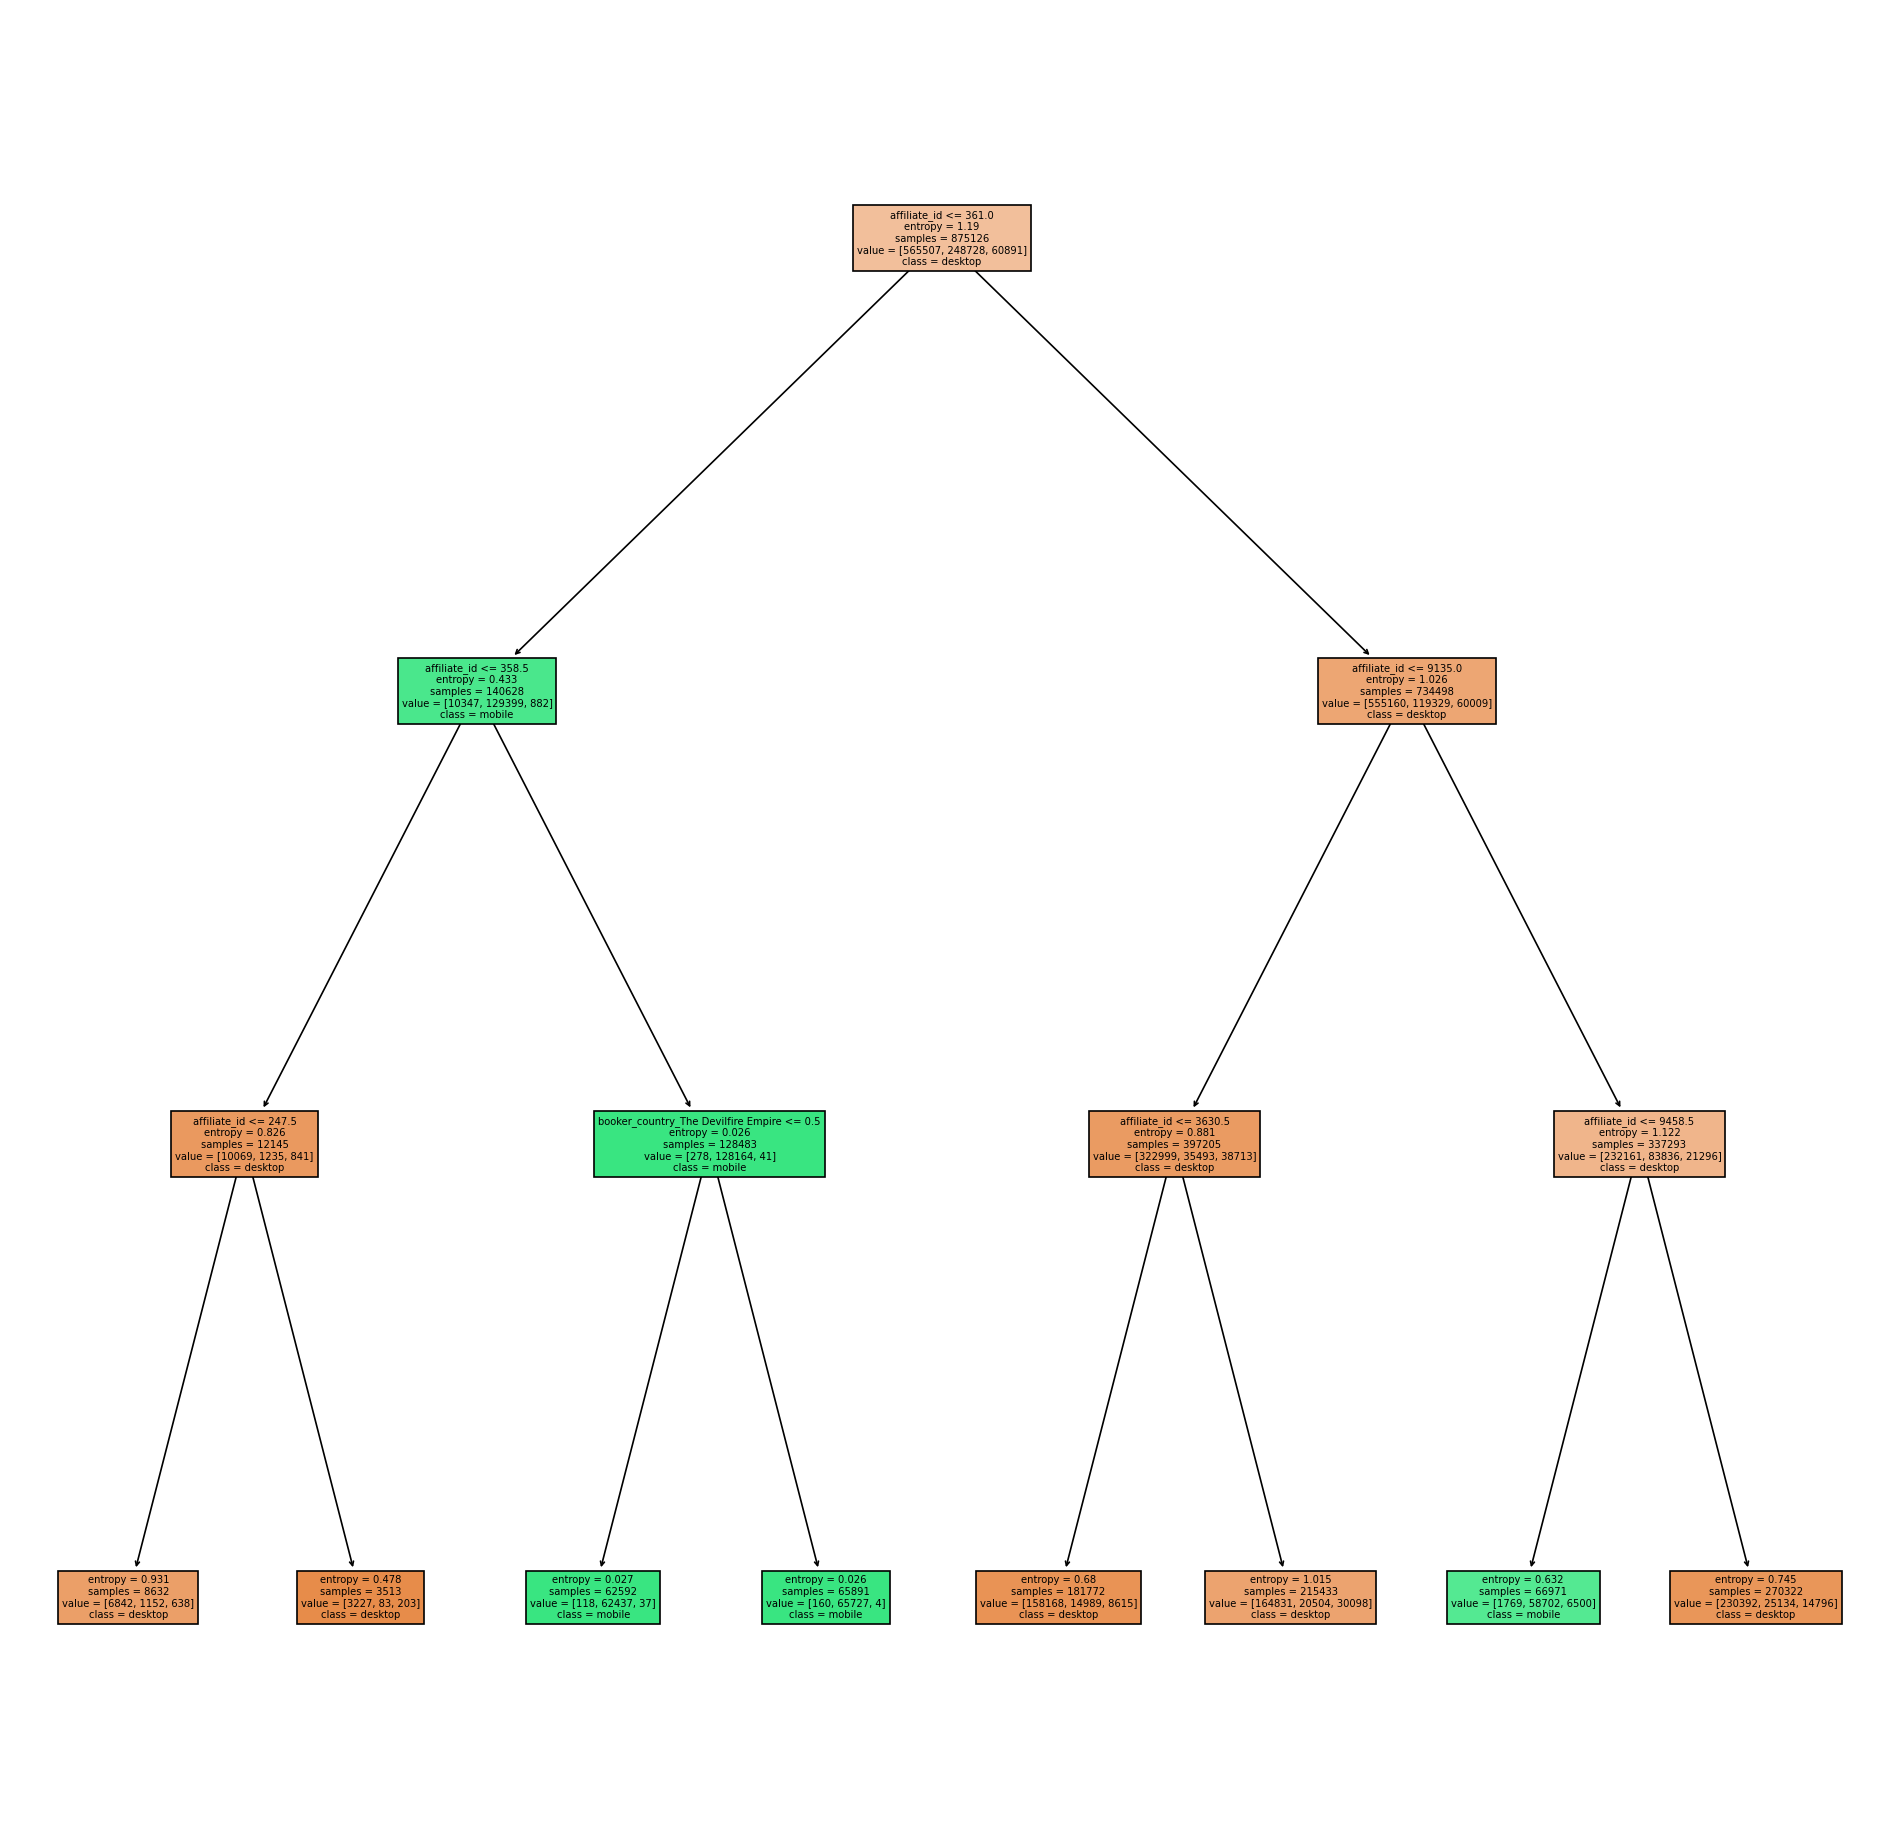

In [18]:
x_train,x_test,y_train,y_test = train_test_split(xs,ys)
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(x_train,y_train)
plt.figure(figsize=(20, 20), dpi=120)
tree.plot_tree(model,
               feature_names=x_train.columns,
               class_names=np.unique(booking['device_class']),
               filled = True)

In [15]:
ys = booking['booker_country']
xs = booking[['city_id','affiliate_id']]

In [16]:
N = 5
experiments = np.array([doExperiment(xs,ys,DecisionTreeClassifier(criterion='entropy')) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.7421164768976425, 0.7421190834000861)

[Text(930.0, 1585.5, 'affiliate_id <= 361.0\nentropy = 1.877\nsamples = 875126\nvalue = [21588, 176506, 401734, 60545, 214753]\nclass = Gondal'),
 Text(465.0, 1132.5, 'affiliate_id <= 273.5\nentropy = 1.835\nsamples = 140568\nvalue = [1369, 19326, 35204, 17017, 67652]\nclass = The Devilfire Empire'),
 Text(232.5, 679.5, 'affiliate_id <= 251.0\nentropy = 1.578\nsamples = 11324\nvalue = [141, 2982, 6480, 399, 1322]\nclass = Gondal'),
 Text(116.25, 226.5, 'entropy = 1.285\nsamples = 8826\nvalue = [139, 544, 6433, 396, 1314]\nclass = Gondal'),
 Text(348.75, 226.5, 'entropy = 0.189\nsamples = 2498\nvalue = [2, 2438, 47, 3, 8]\nclass = Elbonia'),
 Text(697.5, 679.5, 'city_id <= 54115.5\nentropy = 1.798\nsamples = 129244\nvalue = [1228, 16344, 28724, 16618, 66330]\nclass = The Devilfire Empire'),
 Text(581.25, 226.5, 'entropy = 1.824\nsamples = 104040\nvalue = [966, 13309, 23345, 14558, 51862]\nclass = The Devilfire Empire'),
 Text(813.75, 226.5, 'entropy = 1.667\nsamples = 25204\nvalue = [26

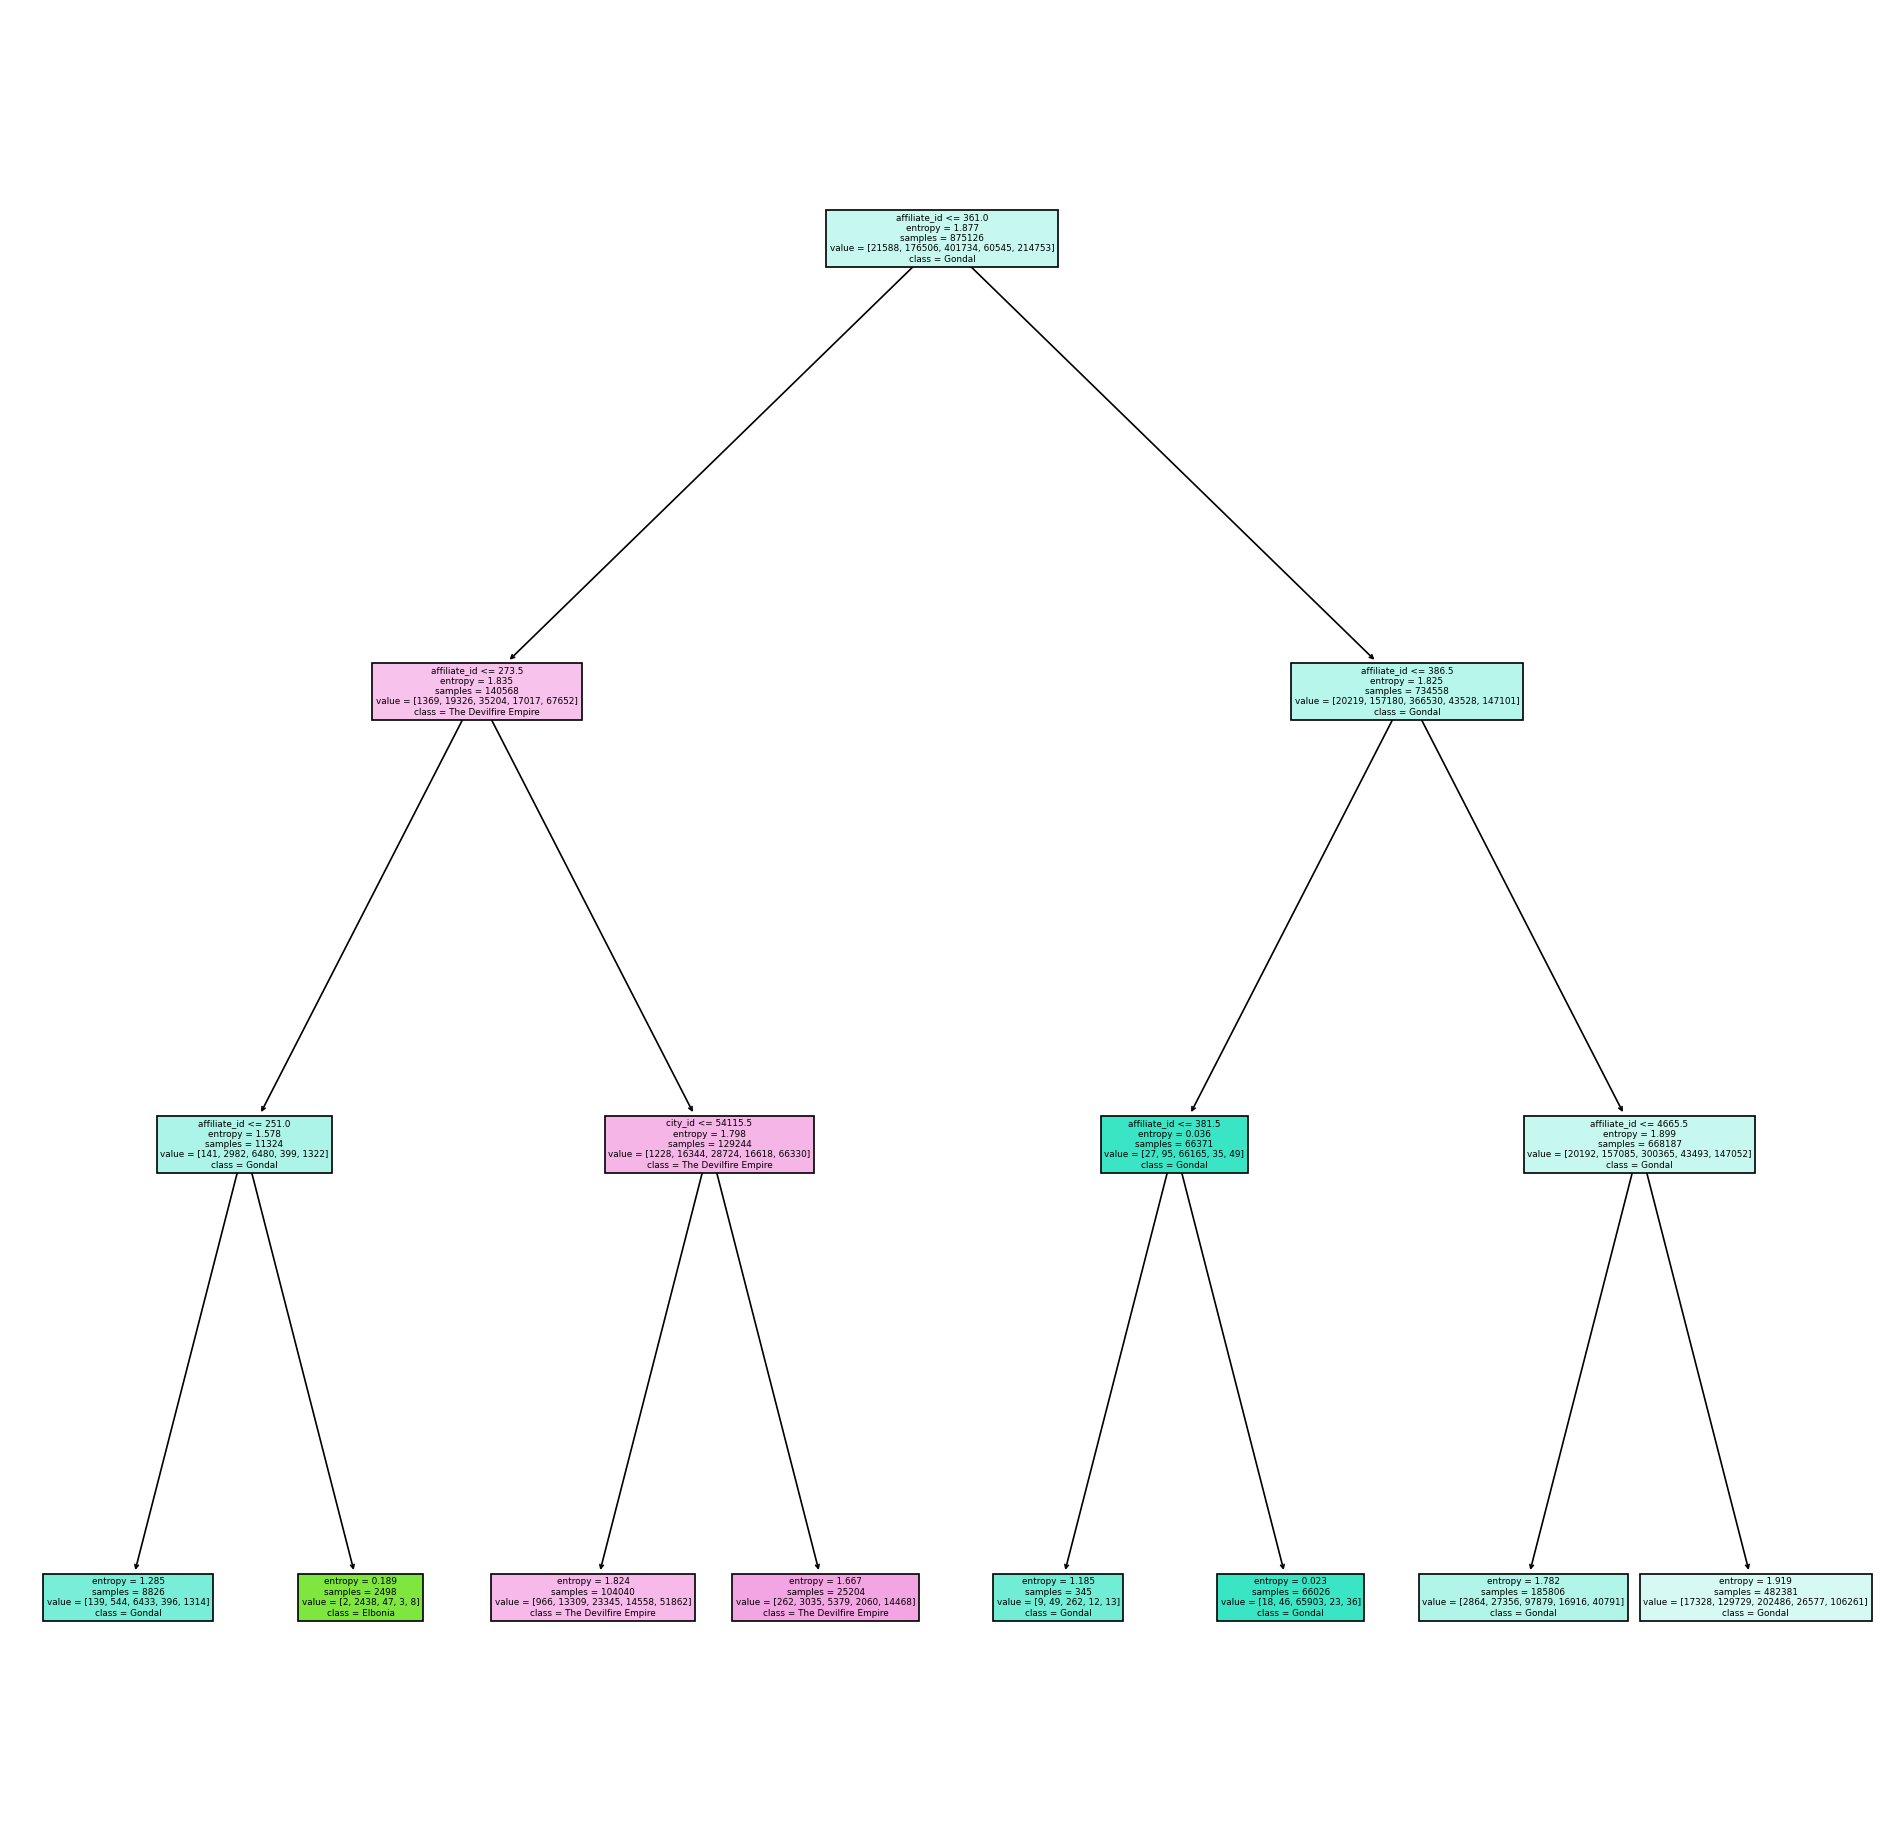

In [17]:
x_train,x_test,y_train,y_test = train_test_split(xs,ys)
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(x_train,y_train)
plt.figure(figsize=(20, 20), dpi=120)
tree.plot_tree(model,
               feature_names=x_train.columns,
               class_names=np.unique(booking['booker_country']),
               filled = True)